#**HANDS ON PYTHON**

#**IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Pandas show all column
pd.set_option('display.max_columns', 200)

import warnings
warnings.filterwarnings("ignore")

#**IMPORT DATASET CSV**

Konteks dari dataset ini ingin melakukan prediksi terhadap customer yang loyal (retention). Churn diartikan sebagai customer pindah ke provider/perusahaan lain. Telco customer churn memprediksi apakah customer akan berpindah provider berdasarkan jangka waktu tertentu.

In [3]:
df = pd.read_csv("dataset.csv", sep = ',')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Melihat jumlah data ada berapa
df.shape

(7043, 21)

In [10]:
#Mencari tau nama columnnya apa saja dalam bentuk list
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [11]:
#Melihat tipe datanya dulu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


df.info() bisa melihat jumlah datanya berapa dan melihat tipe datanya apa

**SUMMARY :**

-Mengganti SeniorCitizen menjadi tipe data object karena valuenya termasuk Yes and No hanya saja di kolom diatas terdiri dari 0 dan 1.

-Memperbaiki TotalCharges menjadi float (data angka yang ada komanya)

-Drop customerID

In [14]:
#lihat jumlah kolom terlebih dahulu
len(df.columns)

20

In [13]:
#Drop kolom customerID karena tidak digunakan
df = df.drop("customerID", axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
#Mengganti tipe data SeniorCitizem menjadi object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [18]:
#Memperbaiki kolom TotalCharges menjadi tipe float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [20]:
#Cek kembali tipe datanya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#**DATA KATEGORI DAN NUMERIK**

In [21]:
list(df.columns)

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [22]:
#Cara mengelompokan data ke dalam category dan numeric
#Jika object masuk ke category
#Jika bukan object masuk ke nums
cats = [i for i in df.columns if df[i].dtype == 'object' and i != 'Churn']
nums = [i for i in df.columns if df[i].dtype != 'object']

In [23]:
cats

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [24]:
nums

['tenure', 'MonthlyCharges', 'TotalCharges']

#**STATISTICAL SUMMARY**

In [25]:
#Melihat jumlah value dari suatu kolom
df.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [26]:
#Cara cepat melihat semua
#Cari tahu jumlah uniq dalam suatu kolom
for col in cats:
  print(df[col].value_counts())
  print() 

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

No                     2810
Yes     

#**PENDEKATAN NUMERIK**

In [27]:
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


**PENJELASAN DARI DATA DESCRIBE MELIHAT STATISTIKNYA**

**tenure** = Berdasarkan kolom count terlihat bahwa tidak ada yang null. Rata-rata dan mediannya tidak terlalu jauh jadi nanti distribusi atau persebarannya tidak akan terlalu miring.

**MonthlyCharges** = rata-rata lebih kecil dibandingkan meannya. Namun tidak terlalu jauh angkanya sehingga akan cenderung sedikit miring ke kiri persebarannya.

**TotalCharges** = Pada data statistik ini dapat diketahui bahwa distribusi atau persebarannya akan cenderung miring ke arah kanan karena rata-ratanya jauh lebih besar dibandingkan mediannya.

#**PENDEKATAN NUMERIK**

In [28]:
df[cats].describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


**PENJELASAN DARI DATA DESCRIBE MELIHAT BERAPA YANG TERBANYAK**

Dari data tersebut dapat dilihat ketimpangan datanya. Contoh pada kolom PhoneService sebanyak 6361 orang menjawab YES sehingga dapat dianggap bahwa hampir seluruh orang memiliki handphone dan ketimpangan data seperti itu akan membuat tingkat akurasi Machine Learning cenderung jelek karena tidak ada pengaruh yang signifikan. Kemudian, data yang baik yaitu ketika terdistribusi dengan baik seperti OnlineBackup, DeviceProtection, dsb.

#**Univariate Analysis**

In [29]:
#Analisis yang numerik terlebih dahulu
df[nums].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


<Axes: xlabel='tenure'>

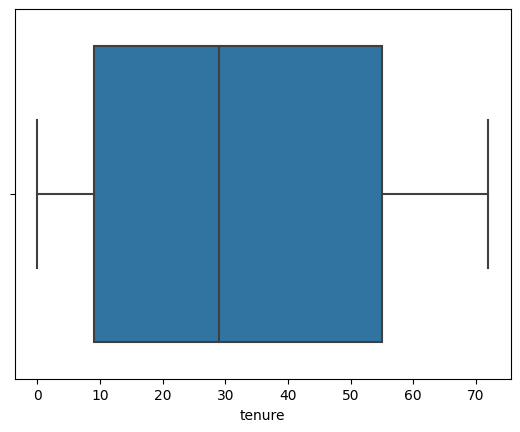

In [30]:
#Cara menampilkan boxplot satu kolom
sns.boxplot(x = 'tenure', data = df)

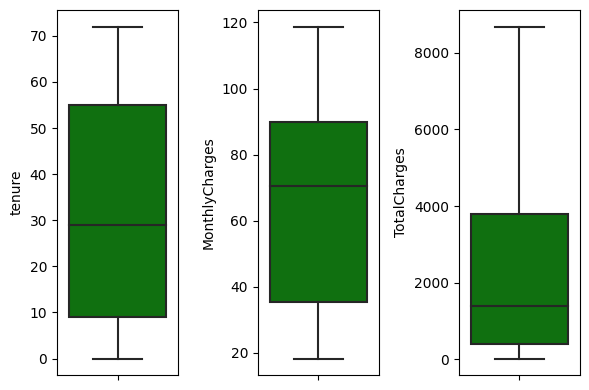

In [31]:
#Cara cepat membuat boxplot secara keseluruhan
#Setting figure panjang 6 lebar 4
plt.figure(figsize = (6,4))
#Loop dari 0 hingga banyaknya nums
for i in range(0, len(nums)):
#Subsplot menentukan gambar yang ada berapa
    plt.subplot(1, 3, i+1)
#Membuat bloxplot dengan y=i (nama kolom berdasar index)
    sns.boxplot(y = df[nums[i]], color = 'green', orient = 'v')
#Memplot data dan merapatkan visualisasinya
    plt.tight_layout()

tenure = Dari seluruh customer, tenurenya ini biasanya berada di dalam 30 tahun. Distribusi (Persebaran customer) terbanyaknya yaitu 10-55 tahun.

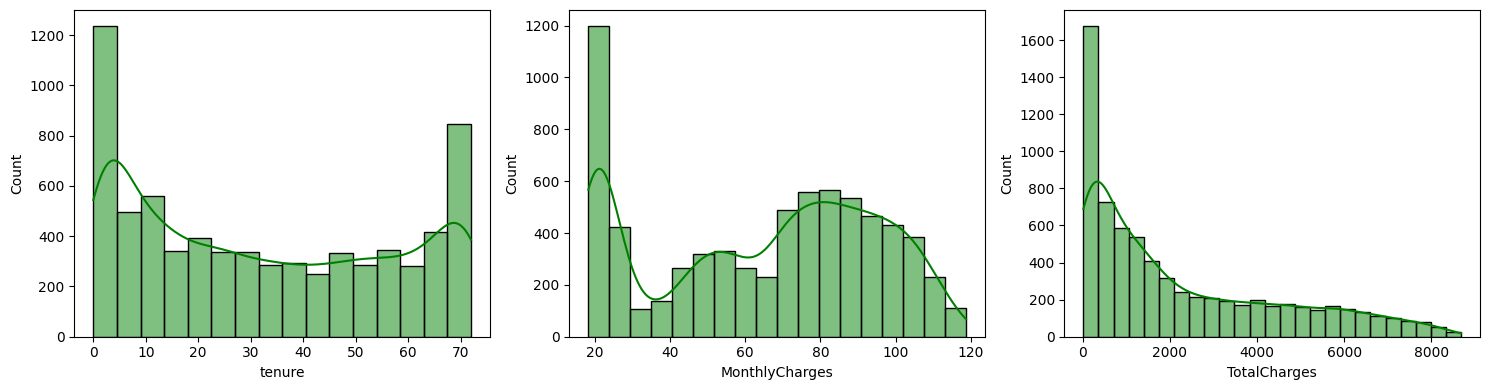

In [33]:
#Setting figure panjang 15 lebar 4
plt.figure(figsize = (15,4))
#Loop dari 0 hingga banyaknya nums
for i in range(0, len(nums)):
#Subsplot menentukan gambarnya ada berapa
    plt.subplot(1, 3, i+1)
#Membuat histplot dengan y=i (nama kolom berdasar index)
    sns.histplot(df[nums[i]], color = 'green', kde = True)
#Memplot data dan merapatkan visualisasinya
    plt.tight_layout()

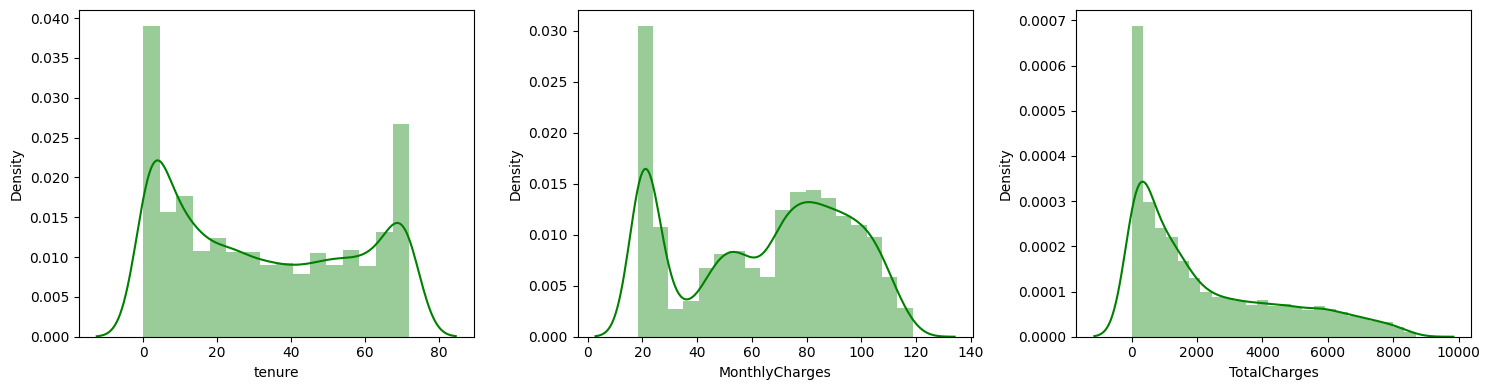

In [34]:
#Setting figure panjang 15 lebar 4
plt.figure(figsize = (15,4))
#Loop dari 0 hingga banyaknya nums
for i in range(0, len(nums)):
#Subsplot menentukan gambar ada berapa
    plt.subplot(1, 3, i+1)
#Membuat distplot dengan y=i (nama kolom berdasar index)
    sns.distplot(df[nums[i]], color = 'green')
#Memplot data dan merapatkan visualisasinya
    plt.tight_layout()

# **COUNTPLOT**

In [35]:
df[cats].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [36]:
len(cats)

16

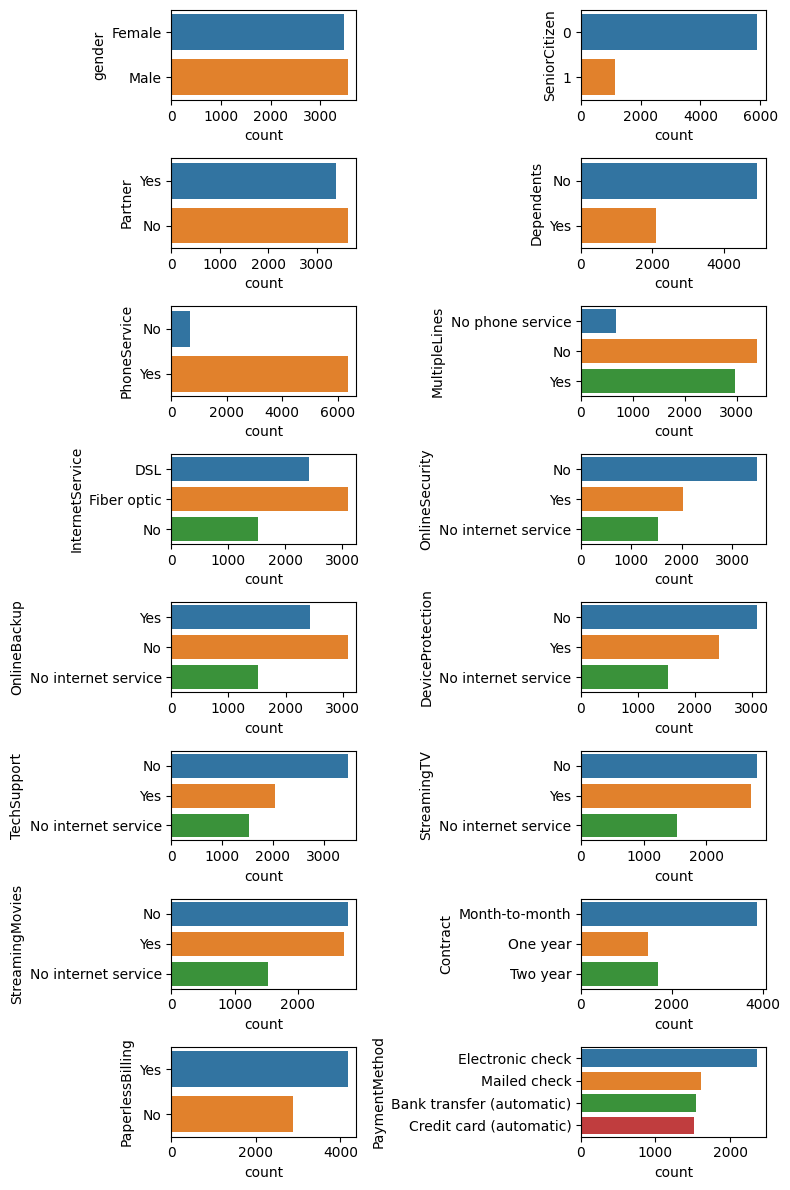

In [37]:
#Setting figure panjang 8 lebar 12
plt.figure(figsize = (8,12))
#Loop dari 0 hingga banyaknya nums
for i in range(0, len(cats)):
#Subsplot menentukan gambar ada berapa
    plt.subplot(8, 2, i+1)
#Membuat countplot dengan y=i (nama kolom berdasar index)
    sns.countplot(y = df[cats[i]], orient = 'v')
#Memplot data dan merapatkan visualisasinya
    plt.tight_layout()

# **BIVARIATE ANALYSIS**

Untuk melihat hubungan satu dengan lainnya

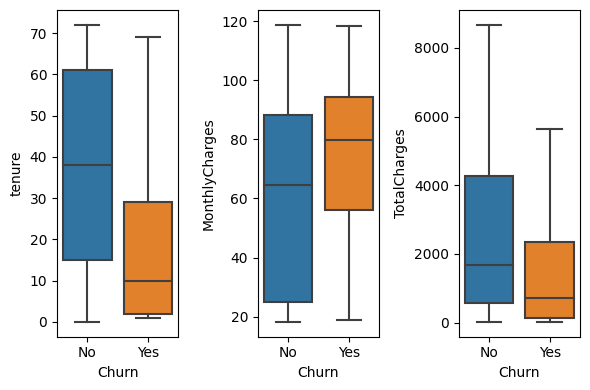

In [38]:
plt.figure(figsize = (6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = df[nums[i]], x = df['Churn'], orient = 'v', showfliers = False)
    plt.tight_layout()

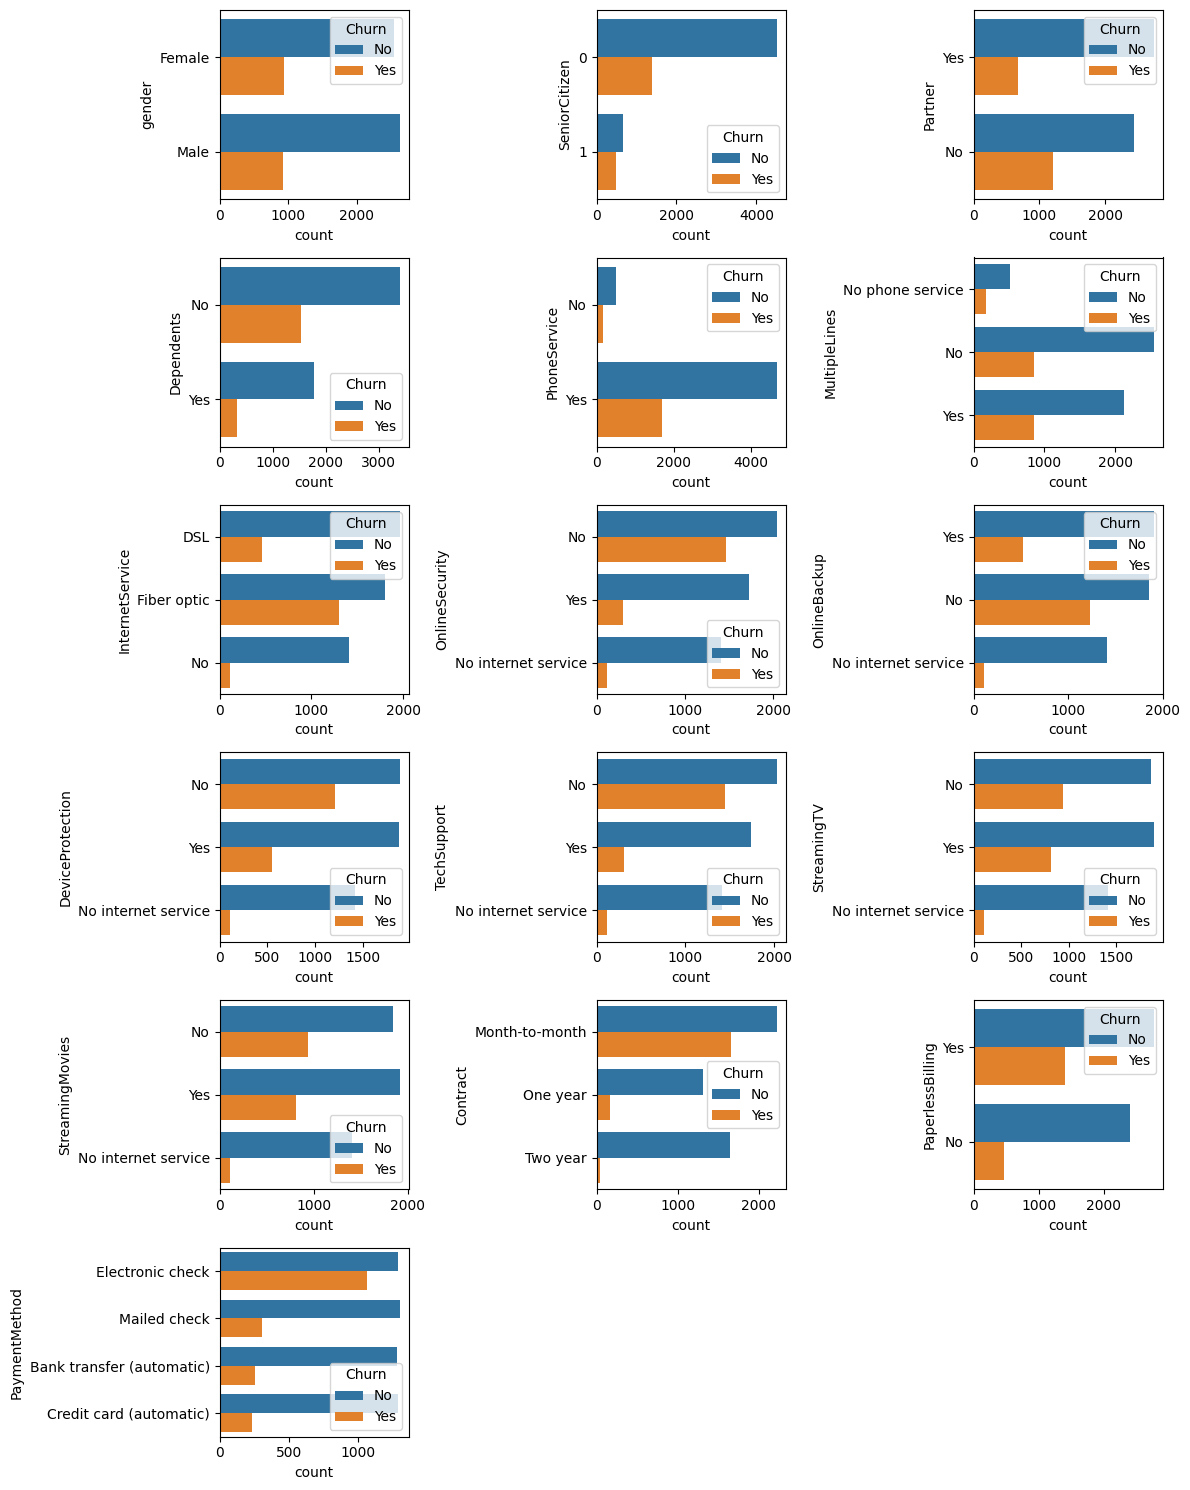

In [39]:
plt.figure(figsize = (12,15))
for i in range(0, len(cats)):
    plt.subplot(6, 3, i+1)
    sns.countplot(y = df[cats[i]], hue = df['Churn'], orient = 'v')
    plt.tight_layout()

<Axes: >

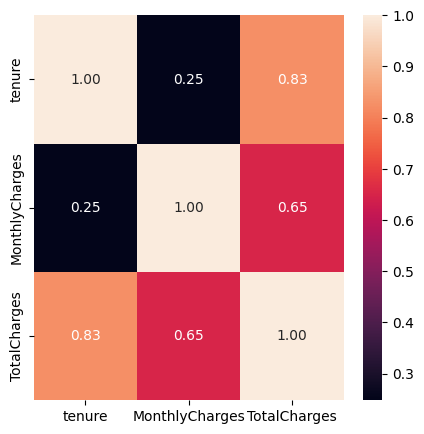

In [40]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

Semakin tinggi tenurenya maka semakin tinggi juga pengeluaran perbulannya.

In [41]:
df[cats].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [42]:
#Mengubah data kategorik menjadi numerik
df2 = pd.get_dummies(df, drop_first = True)

In [43]:
df2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


<Axes: >

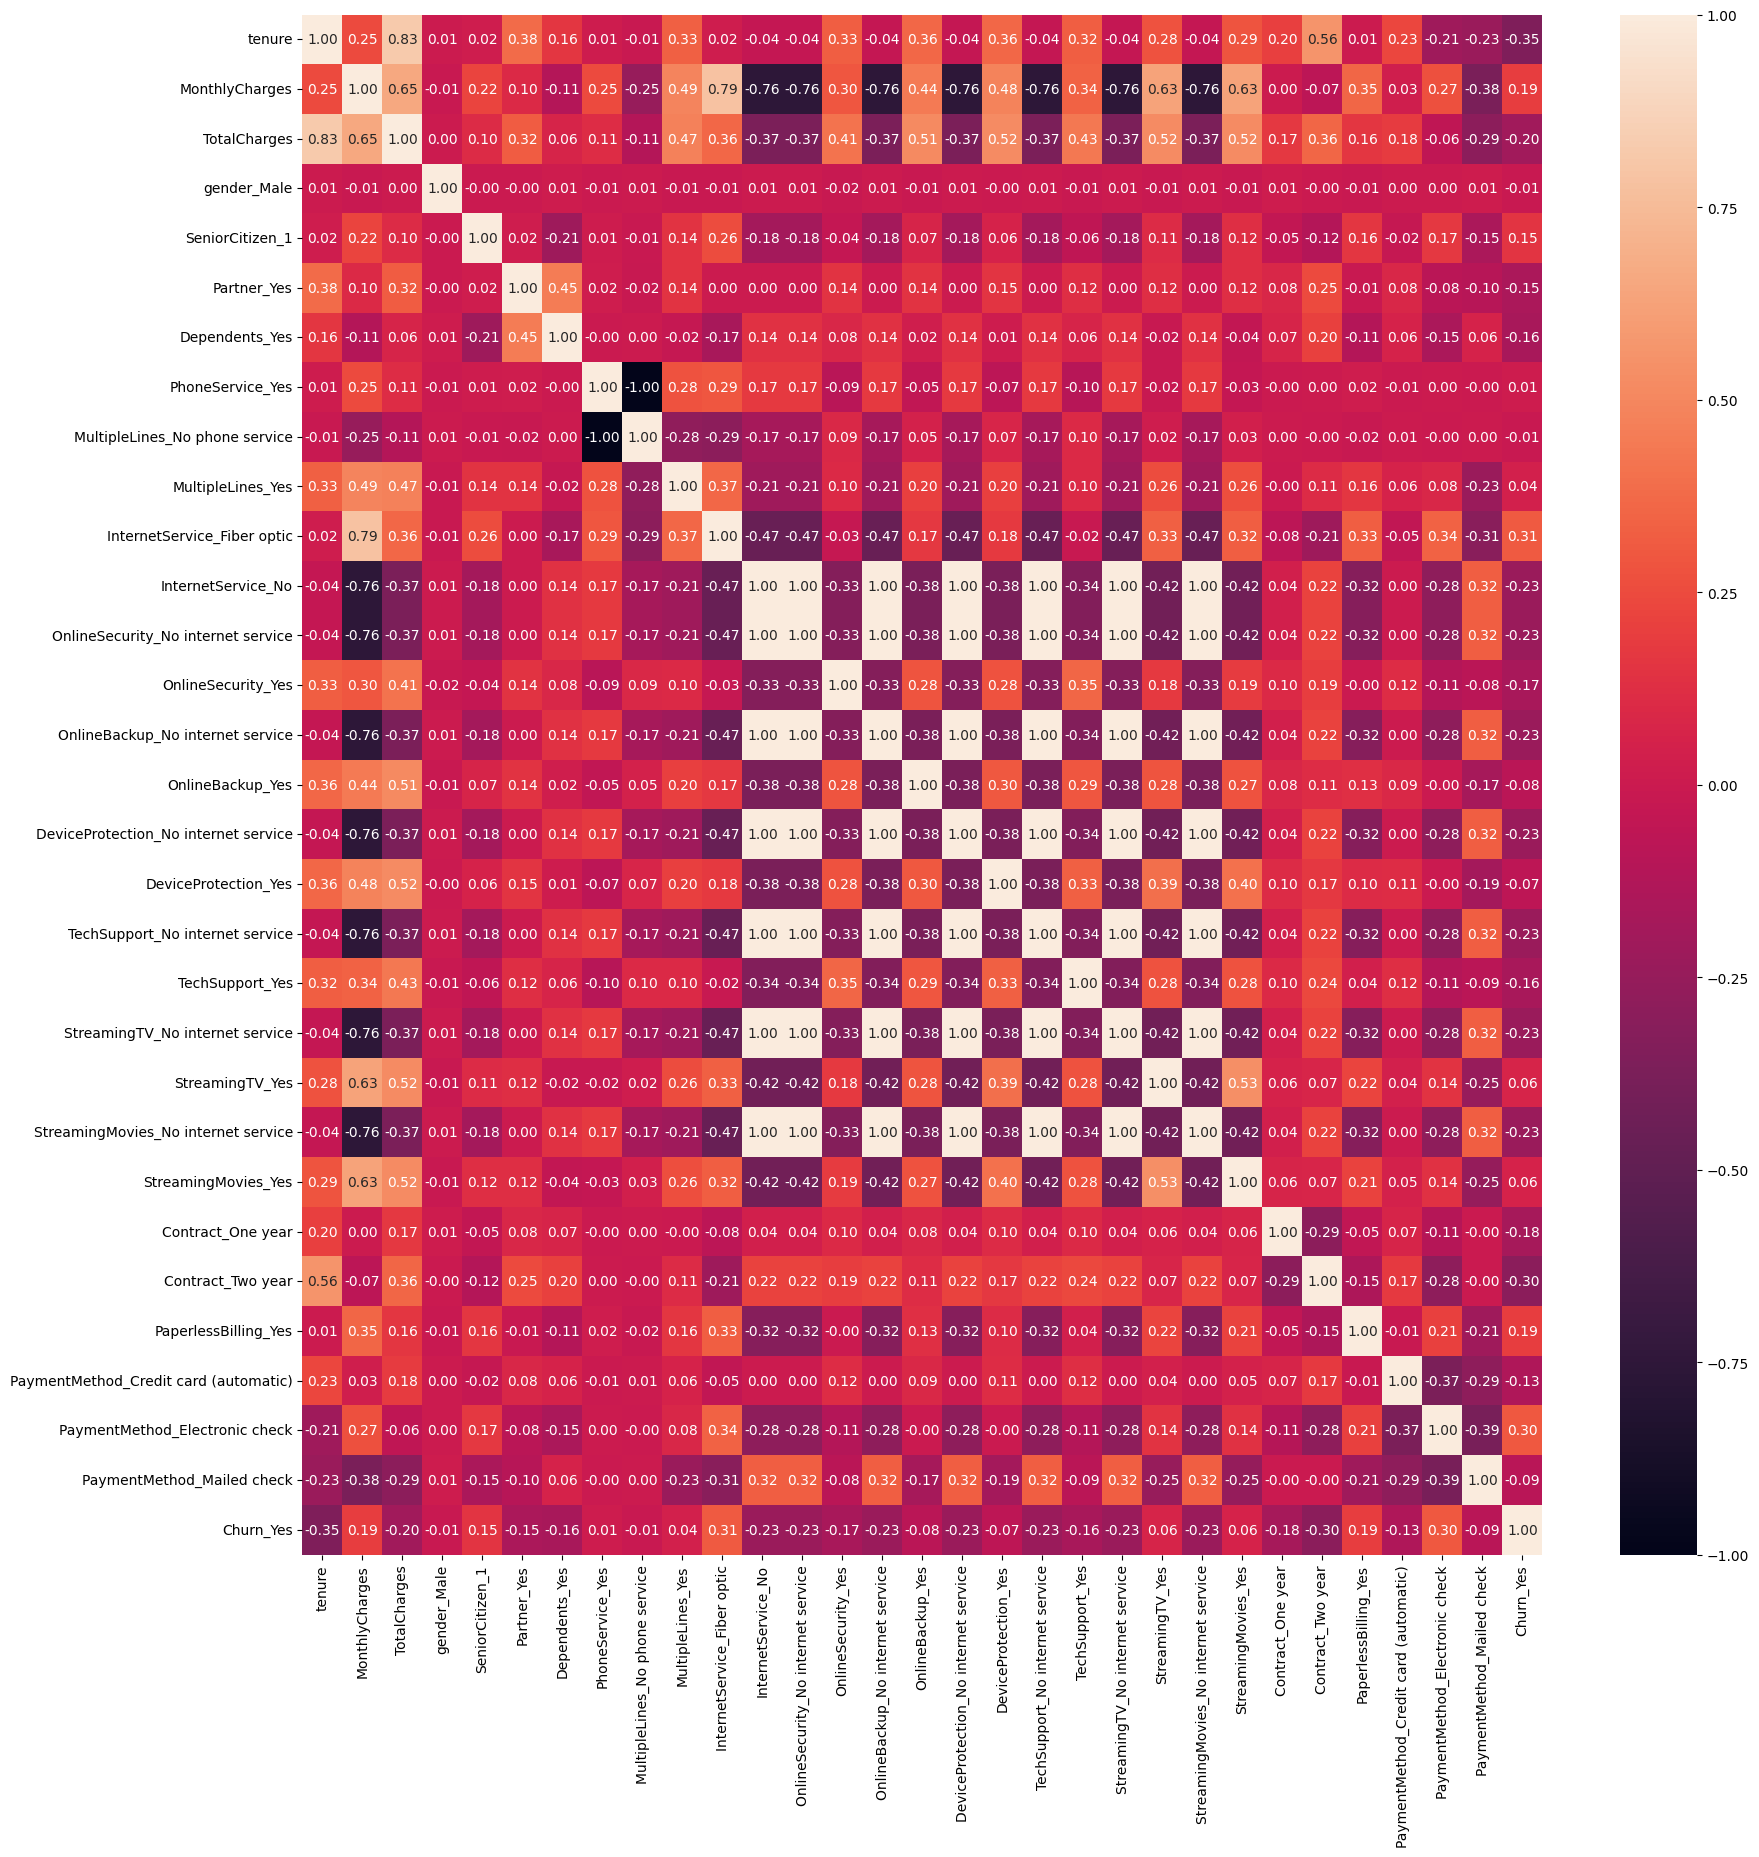

In [44]:
plt.figure(figsize = (20, 20))
sns.heatmap(df2.corr(), annot = True, fmt=".2f")

In [48]:
df2.corr()['Churn_Yes']

tenure                                  -0.352229
MonthlyCharges                           0.193356
TotalCharges                            -0.199484
gender_Male                             -0.008612
SeniorCitizen_1                          0.150889
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
PhoneService_Yes                         0.011942
MultipleLines_No phone service          -0.011942
MultipleLines_Yes                        0.040102
InternetService_Fiber optic              0.308020
InternetService_No                      -0.227890
OnlineSecurity_No internet service      -0.227890
OnlineSecurity_Yes                      -0.171226
OnlineBackup_No internet service        -0.227890
OnlineBackup_Yes                        -0.082255
DeviceProtection_No internet service    -0.227890
DeviceProtection_Yes                    -0.066160
TechSupport_No internet service         -0.227890
TechSupport_Yes                         -0.164674
